In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

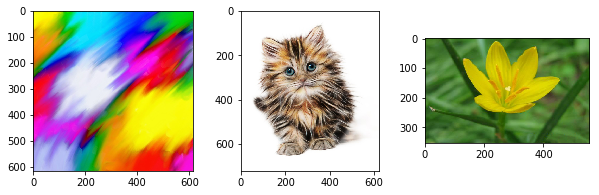

In [2]:
DATA_DIR = 'Data/augmentation/'
images = glob.glob(DATA_DIR + '*')

plt.figure(figsize=(10, 10))
i = 1
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i)
    plt.imshow(img)
    i += 1
plt.show()

In [3]:
def plot_images(image, function, *args):
    plt.figure(figsize=(10, 10))
    n_examples = 3
    for i in range(n_examples):
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = function(img, *args)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
    plt.show()

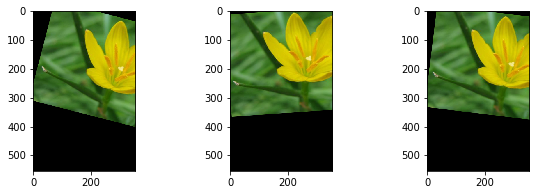

In [4]:
def rotate_image(image, rotate=20):
    width, height, _ = image.shape
    random_rotation = np.random.uniform(low=-rotate, high=rotate)
    M = cv2.getRotationMatrix2D((width/2, height/2), random_rotation, 1)
    return(cv2.warpAffine(image, M, (width, height)))

plot_images(images[2], rotate_image, 40)

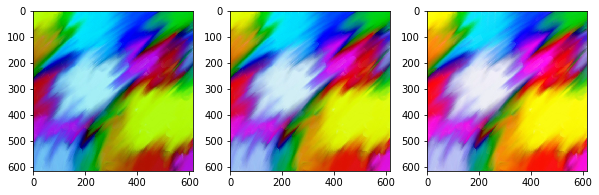

In [5]:
 def adjust_brightness(image, brightness=60):
    rand_brightness = np.random.uniform(low=-brightness, high=brightness)
    return(cv2.add(image, rand_brightness))

plot_images(images[0], adjust_brightness, 85)

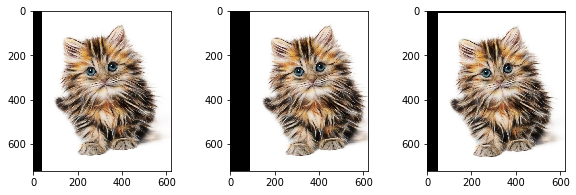

In [6]:
def random_shifts(image, shift_max_x=100, shift_max_y=100):
    width, height, _ = image.shape
    shift_x = np.random.randint(shift_max_x)
    shift_y = np.random.randint(shift_max_y)
    M = np.float32([[1, 0, shift_x],[0, 1, shift_y]])
    return (cv2.warpAffine(image, M, (height, width)))

plot_images(images[1], random_shifts, 100, 20)

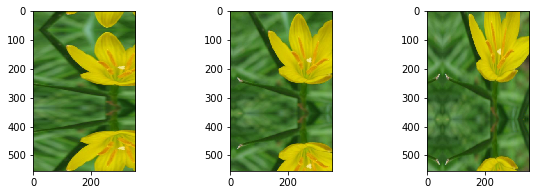

In [7]:
def scale_image(image, scale_range=[0.6, 1.4]):
    width, height, _ = image.shape    
    
    scale_x = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_y = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_matrix = np.array([[scale_x, 0., (1. - scale_x) * width / 2.], 
                             [0., scale_y, (1. - scale_y) * height / 2.]], 
                            dtype=np.float32)
    return(cv2.warpAffine(image, scale_matrix, (width, height), flags=cv2.INTER_LINEAR, 
                         borderMode=cv2.BORDER_REFLECT_101))

plot_images(images[2], scale_image, [0.7, 1.3])

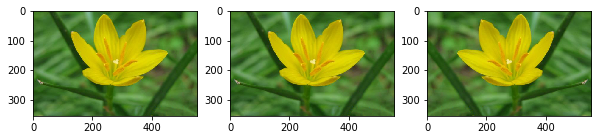

In [8]:
def random_flip(image, p_flip=0.5):
    rand = np.random.random()
    if rand < p_flip:
        image = cv2.flip(image, 1)
    return image

plot_images(images[2], random_flip)